In [1]:
!pip install arabic-reshaper
!pip install python-bidi

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import re
from collections import Counter
from nltk.corpus import stopwords
import nltk
from sklearn.metrics import jaccard_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import warnings
import arabic_reshaper
from bidi.algorithm import get_display
from nltk.tokenize import word_tokenize

from wordcloud import WordCloud

warnings.filterwarnings("ignore")

warnings.filterwarnings("ignore", category=RuntimeWarning)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df1 = pd.read_csv('/kaggle/input/hespress/stories_art-et-culture.csv', encoding='utf8')
df2 = pd.read_csv('/kaggle/input/hespress/stories_economie.csv', encoding='utf8')
df3 = pd.read_csv('/kaggle/input/hespress/stories_faits-divers.csv', encoding='utf8')
df4 = pd.read_csv('/kaggle/input/hespress/stories_marocains-du-monde.csv', encoding='utf8')
df5 = pd.read_csv('/kaggle/input/hespress/stories_medias.csv', encoding='utf8')
df6 = pd.read_csv('/kaggle/input/hespress/stories_orbites.csv', encoding='utf8')
df7 = pd.read_csv('/kaggle/input/hespress/stories_politique.csv', encoding='utf8')
df8 = pd.read_csv('/kaggle/input/hespress/stories_regions.csv', encoding='utf8')
df9 = pd.read_csv('/kaggle/input/hespress/stories_societe.csv', encoding='utf8')
df10 = pd.read_csv('/kaggle/input/hespress/stories_sport.csv', encoding='utf8')
df11 = pd.read_csv('/kaggle/input/hespress/stories_tamazight.csv', encoding='utf8')

In [4]:
# List of dataframes
dfs = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11]

In [5]:
# Concatenate all dataframes into one dataframe
final_df = pd.concat(dfs, ignore_index=True)

In [6]:
final_df

,Unnamed: 0,id,title,date,author,story,topic
0,0,f06aa998054e11eba66e646e69d991ea,"""بيت الشعر"" يسائل وزير الثقافة عن كوابيس سوداء",الجمعة 02 أكتوبر 2020 - 23:19,هسبريس من الرباط,"وجه ""بيت الشعر في المغرب"" إلى وزير الثقافة وال...",art-et-culture
1,1,f1cf1b9c054e11ebb718646e69d991ea,"مهرجان ""سينما المؤلّف"" يستحضر روح ثريا جبران",الجمعة 02 أكتوبر 2020 - 07:26,هسبريس من الرباط,في ظلّ استمرار حالة الطوارئ الصحية المرتبطة بج...,art-et-culture
2,2,f2d282a4054e11eb800f646e69d991ea,"فيلم ""بدون عنف"" لهشام العسري ..""كعب الحذاء ووا...",الجمعة 02 أكتوبر 2020 - 04:00,عفيفة الحسينات*,تشير مشاهدة فيلم قصير ضمن الثلاثية الأخيرة للم...,art-et-culture
3,3,f3f46cac054e11eba403646e69d991ea,"""تنين ووهان"" .. مريم أيت أحمد توقِّع أولى ""روا...",الجمعة 02 أكتوبر 2020 - 02:00,حاورَها: وائل بورشاشن,"مِن قَلب أيّام ""الحَجْر""، رأتِ النّورَ الفصول ...",art-et-culture
4,4,f50f0476054e11eba31b646e69d991ea,"مسكر يتخلّى عن دعم ""الوزارة"" بسبب ""الجمهور""",الخميس 01 أكتوبر 2020 - 19:40,هسبريس من الرباط,أعلن الفنان المغربيّ سعيد مسكر تخليه عن مبلغ ا...,art-et-culture
...,...,...,...,...,...,...,...
10995,995,75b0b940055811ebb2ff646e69d991ea,"نشطاء أمازيغ يدافعون عن ""الحقّ"" في استقبال إسر...",الثلاثاء 10 شتنبر 2013 - 02:00,هسبريس ـ ميمون أم العيد,دافع ناشطون أمازيغ استقبلوا أخيرا وفدا من الطل...,tamazight
10996,996,775c3440055811ebbc60646e69d991ea,شاعرة أمازيغية تعتصم بالمطار لرفض استمارتها بـ...,الاثنين 09 شتنبر 2013 - 08:20,هسبريس ـ عبد المغيث جبران,خاضت الشاعرة الأمازيغية ملكية مزان اعتصاما لمد...,tamazight
10997,997,78fea9ba055811eb9e32646e69d991ea,وفد إسرائيلي يزور المغرب ويلتقي نشطاء أمازيغ ب...,الثلاثاء 03 شتنبر 2013 - 16:24,هسبريس - ماجدة أيت لكتاوي,أدانت المنسقية الوطنية للمبادرة الطلابية ضد ال...,tamazight
10998,998,7a58d38c055811ebb9c9646e69d991ea,نقاش أمازيغيّ مؤنّث بطنجة يذكّر بكَوْن الحقوق ...,السبت 17 غشت 2013 - 10:30,هسبريس من طنجة,طالبت الناشطة الأمازيغية مريم الدمناتي بضرورة ...,tamazight


# Clean Data

### Remove unnecessary columns

In [7]:
final_df.drop(columns=['Unnamed: 0',"id"],inplace=True)

### Remove duplicated

In [8]:
final_df.duplicated().sum()

2

In [9]:
final_df= final_df.drop_duplicates()

In [10]:
final_df.duplicated().sum()

0

In [11]:
final_df.isnull().sum()

title     0
date      0
author    0
story     0
topic     0
dtype: int64

### remove stopwords

In [12]:
stop_words = set(stopwords.words('arabic'))

In [13]:

# Function to remove stopwords
def remove_stopwords(text):
    words = nltk.word_tokenize(text)
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

In [14]:
#Apply the function to the 'story','title' column 
final_df['story'] = final_df['story'].apply(remove_stopwords)
final_df['title'] = final_df['story'].apply(remove_stopwords)

# EDA

In [15]:
final_df.head()

,title,date,author,story,topic
0,وجه `` بيت الشعر المغرب '' وزير الثقافة والشبا...,الجمعة 02 أكتوبر 2020 - 23:19,هسبريس من الرباط,وجه `` بيت الشعر المغرب '' وزير الثقافة والشبا...,art-et-culture
1,استمرار حالة الطوارئ الصحية المرتبطة بجائحة ``...,الجمعة 02 أكتوبر 2020 - 07:26,هسبريس من الرباط,استمرار حالة الطوارئ الصحية المرتبطة بجائحة ``...,art-et-culture
2,تشير مشاهدة فيلم قصير ضمن الثلاثية الأخيرة للم...,الجمعة 02 أكتوبر 2020 - 04:00,عفيفة الحسينات*,تشير مشاهدة فيلم قصير ضمن الثلاثية الأخيرة للم...,art-et-culture
3,مِن قَلب أيّام `` الحَجْر '' ، رأتِ النّورَ ال...,الجمعة 02 أكتوبر 2020 - 02:00,حاورَها: وائل بورشاشن,مِن قَلب أيّام `` الحَجْر '' ، رأتِ النّورَ ال...,art-et-culture
4,أعلن الفنان المغربيّ سعيد مسكر تخليه مبلغ الدّ...,الخميس 01 أكتوبر 2020 - 19:40,هسبريس من الرباط,أعلن الفنان المغربيّ سعيد مسكر تخليه مبلغ الدّ...,art-et-culture


In [16]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10998 entries, 0 to 10999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   10998 non-null  object
 1   date    10998 non-null  object
 2   author  10998 non-null  object
 3   story   10998 non-null  object
 4   topic   10998 non-null  object
dtypes: object(5)
memory usage: 515.5+ KB


In [17]:
# Summary statistics
final_df.describe()

,title,date,author,story,topic
count,10998,10998,10998,10998,10998
unique,10996,10942,874,10996,11
top,ترأس الملك محمد السادس، اليوم، جلسة عمل خصصت ل...,الخميس 01 أكتوبر 2020 - 12:30,هسبريس من الرباط,ترأس الملك محمد السادس، اليوم، جلسة عمل خصصت ل...,art-et-culture
freq,2,2,3941,2,1000


In [18]:
# Number of examples per class
topic_counts = final_df['topic'].value_counts()
print(topic_counts)


art-et-culture        1000
faits-divers          1000
marocains-du-monde    1000
medias                1000
orbites               1000
politique             1000
societe               1000
sport                 1000
tamazight             1000
economie               999
regions                999
Name: topic, dtype: int64


#### number of examples per class

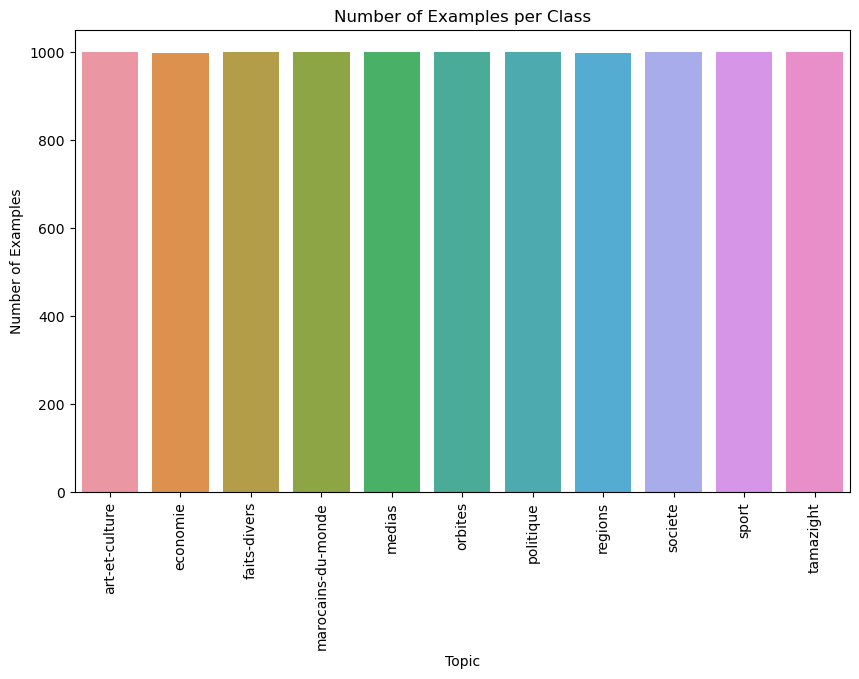

In [19]:
#number of examples per class
plt.figure(figsize=(10, 6))
sns.countplot(data=final_df, x='topic')
plt.xticks(rotation=90)
plt.xlabel('Topic')
plt.ylabel('Number of Examples')
plt.title('Number of Examples per Class')
plt.show()

#### Top frequent n-grams generally (title column)

In [20]:
# Top frequent n-grams generally
def get_ngrams(text, n=1):
    words = re.findall(r'\w+', text.lower())
    ngrams = [tuple(words[i:i+n]) for i in range(len(words) - n + 1)]
    return ngrams

all_texts = ' '.join(final_df['title'])
all_ngrams = get_ngrams(all_texts, n=3) 
top_ngrams = Counter(all_ngrams).most_common(40)
print("Top frequent n-grams (overall):\n", top_ngrams)

Top frequent n-grams (overall):
 [(('الملك', 'محمد', 'السادس'), 1150), (('فيروس', 'كورونا', 'المستجد'), 1107), (('لجريدة', 'هسبريس', 'الإلكترونية'), 814), (('تصريح', 'لجريدة', 'هسبريس'), 679), (('بفيروس', 'كورونا', 'المستجد'), 649), (('النيابة', 'العامة', 'المختصة'), 613), (('حالة', 'الطوارئ', 'الصحية'), 610), (('سعد', 'الدين', 'العثماني'), 592), (('الملكي', 'للثقافة', 'الأمازيغية'), 514), (('حزب', 'العدالة', 'والتنمية'), 471), (('الطابع', 'الرسمي', 'للأمازيغية'), 443), (('المعهد', 'الملكي', 'للثقافة'), 421), (('وزارة', 'التربية', 'الوطنية'), 411), (('مواقع', 'التواصل', 'الاجتماعي'), 386), (('انتشار', 'فيروس', 'كورونا'), 376), (('جريدة', 'هسبريس', 'الإلكترونية'), 364), (('تفشي', 'فيروس', 'كورونا'), 350), (('العامة', 'للأمن', 'الوطني'), 347), (('الشؤون', 'الخارجية', 'والتعاون'), 329), (('جائحة', 'كوفيد', '19'), 320), (('جائحة', 'فيروس', 'كورونا'), 313), (('فترة', 'الحجر', 'الصحي'), 286), (('وزير', 'الشؤون', 'الخارجية'), 274), (('إشراف', 'النيابة', 'العامة'), 266), (('والمالية', 'وإصلاح'

In [21]:
# Top frequent n-grams per class
top_ngrams_per_class = {}
for topic in final_df['topic'].unique():
    topic_texts = ' '.join(final_df[final_df['topic'] == topic]['title'])
    topic_ngrams = get_ngrams(topic_texts, n=2)
    top_ngrams_per_class[topic] = Counter(topic_ngrams).most_common(10)
print("Top frequent n-grams per class:\n", top_ngrams_per_class)

Top frequent n-grams per class:
 {'art-et-culture': [(('الت', 'ي'), 231), (('أن', 'ه'), 168), (('وزارة', 'الثقافة'), 151), (('م', 'ن'), 147), (('فيروس', 'كورونا'), 138), (('والشباب', 'والرياضة'), 135), (('الثقافة', 'والشباب'), 132), (('التواصل', 'الاجتماعي'), 127), (('اللغة', 'العربية'), 116), (('محمد', 'السادس'), 100)], 'economie': [(('فيروس', 'كورونا'), 508), (('كورونا', 'المستجد'), 312), (('كوفيد', '19'), 300), (('الحجر', 'الصحي'), 279), (('جائحة', 'كورونا'), 256), (('مليار', 'درهم'), 252), (('السنة', 'الجارية'), 238), (('الاقتصاد', 'والمالية'), 210), (('سنة', '2019'), 205), (('الدار', 'البيضاء'), 201)], 'faits-divers': [(('النيابة', 'العامة'), 730), (('العامة', 'المختصة'), 554), (('الحراسة', 'النظرية'), 408), (('الدرك', 'الملكي'), 343), (('تدبير', 'الحراسة'), 239), (('مصادر', 'هسبريس'), 239), (('إشراف', 'النيابة'), 228), (('الشرطة', 'القضائية'), 225), (('للأمن', 'الوطني'), 221), (('رهن', 'إشارة'), 215)], 'marocains-du-monde': [(('الجالية', 'المغربية'), 610), (('مغاربة', 'العالم'), 

#### Top frequent n-grams generally (story column)

In [22]:
# Top frequent n-grams generally
def get_ngrams(text, n=1):
    words = re.findall(r'\w+', text.lower())
    ngrams = [tuple(words[i:i+n]) for i in range(len(words) - n + 1)]
    return ngrams

all_texts = ' '.join(final_df['story'])
all_ngrams = get_ngrams(all_texts, n=3) 
top_ngrams = Counter(all_ngrams).most_common(40)
print("Top frequent n-grams (overall):\n", top_ngrams)

Top frequent n-grams (overall):
 [(('الملك', 'محمد', 'السادس'), 1150), (('فيروس', 'كورونا', 'المستجد'), 1107), (('لجريدة', 'هسبريس', 'الإلكترونية'), 814), (('تصريح', 'لجريدة', 'هسبريس'), 679), (('بفيروس', 'كورونا', 'المستجد'), 649), (('النيابة', 'العامة', 'المختصة'), 613), (('حالة', 'الطوارئ', 'الصحية'), 610), (('سعد', 'الدين', 'العثماني'), 592), (('الملكي', 'للثقافة', 'الأمازيغية'), 514), (('حزب', 'العدالة', 'والتنمية'), 471), (('الطابع', 'الرسمي', 'للأمازيغية'), 443), (('المعهد', 'الملكي', 'للثقافة'), 421), (('وزارة', 'التربية', 'الوطنية'), 411), (('مواقع', 'التواصل', 'الاجتماعي'), 386), (('انتشار', 'فيروس', 'كورونا'), 376), (('جريدة', 'هسبريس', 'الإلكترونية'), 364), (('تفشي', 'فيروس', 'كورونا'), 350), (('العامة', 'للأمن', 'الوطني'), 347), (('الشؤون', 'الخارجية', 'والتعاون'), 329), (('جائحة', 'كوفيد', '19'), 320), (('جائحة', 'فيروس', 'كورونا'), 313), (('فترة', 'الحجر', 'الصحي'), 286), (('وزير', 'الشؤون', 'الخارجية'), 274), (('إشراف', 'النيابة', 'العامة'), 266), (('والمالية', 'وإصلاح'

In [23]:
# Top frequent n-grams per class (topic)
top_ngrams_per_class = {}
for topic in final_df['topic'].unique():
    topic_texts = ' '.join(final_df[final_df['topic'] == topic]['story'])
    topic_ngrams = get_ngrams(topic_texts, n=2)
    top_ngrams_per_class[topic] = Counter(topic_ngrams).most_common(10)
print("Top frequent n-grams per class:\n", top_ngrams_per_class)

Top frequent n-grams per class:
 {'art-et-culture': [(('الت', 'ي'), 231), (('أن', 'ه'), 168), (('وزارة', 'الثقافة'), 151), (('م', 'ن'), 147), (('فيروس', 'كورونا'), 138), (('والشباب', 'والرياضة'), 135), (('الثقافة', 'والشباب'), 132), (('التواصل', 'الاجتماعي'), 127), (('اللغة', 'العربية'), 116), (('محمد', 'السادس'), 100)], 'economie': [(('فيروس', 'كورونا'), 508), (('كورونا', 'المستجد'), 312), (('كوفيد', '19'), 300), (('الحجر', 'الصحي'), 279), (('جائحة', 'كورونا'), 256), (('مليار', 'درهم'), 252), (('السنة', 'الجارية'), 238), (('الاقتصاد', 'والمالية'), 210), (('سنة', '2019'), 205), (('الدار', 'البيضاء'), 201)], 'faits-divers': [(('النيابة', 'العامة'), 730), (('العامة', 'المختصة'), 554), (('الحراسة', 'النظرية'), 408), (('الدرك', 'الملكي'), 343), (('تدبير', 'الحراسة'), 239), (('مصادر', 'هسبريس'), 239), (('إشراف', 'النيابة'), 228), (('الشرطة', 'القضائية'), 225), (('للأمن', 'الوطني'), 221), (('رهن', 'إشارة'), 215)], 'marocains-du-monde': [(('الجالية', 'المغربية'), 610), (('مغاربة', 'العالم'), 

### "Conclusion: The 'title' and 'story' columns have the same n-grams." 

#### Lengths of examples in words and letters (title & story columns).

In [24]:

final_df['title_word_count'] = final_df['title'].apply(lambda x: len(re.findall(r'\w+', x)))
final_df['title_letter_count'] = final_df['title'].apply(lambda x: len(re.sub(r'\s', '', x)))
final_df['story_word_count'] = final_df['story'].apply(lambda x: len(re.findall(r'\w+', x)))
final_df['story_letter_count'] = final_df['story'].apply(lambda x: len(re.sub(r'\s', '', x)))



In [25]:
final_df.head(5)

,title,date,author,story,topic,title_word_count,title_letter_count,story_word_count,story_letter_count
0,وجه `` بيت الشعر المغرب '' وزير الثقافة والشبا...,الجمعة 02 أكتوبر 2020 - 23:19,هسبريس من الرباط,وجه `` بيت الشعر المغرب '' وزير الثقافة والشبا...,art-et-culture,529,2918,529,2918
1,استمرار حالة الطوارئ الصحية المرتبطة بجائحة ``...,الجمعة 02 أكتوبر 2020 - 07:26,هسبريس من الرباط,استمرار حالة الطوارئ الصحية المرتبطة بجائحة ``...,art-et-culture,330,1894,330,1894
2,تشير مشاهدة فيلم قصير ضمن الثلاثية الأخيرة للم...,الجمعة 02 أكتوبر 2020 - 04:00,عفيفة الحسينات*,تشير مشاهدة فيلم قصير ضمن الثلاثية الأخيرة للم...,art-et-culture,427,2295,427,2295
3,مِن قَلب أيّام `` الحَجْر '' ، رأتِ النّورَ ال...,الجمعة 02 أكتوبر 2020 - 02:00,حاورَها: وائل بورشاشن,مِن قَلب أيّام `` الحَجْر '' ، رأتِ النّورَ ال...,art-et-culture,723,3875,723,3875
4,أعلن الفنان المغربيّ سعيد مسكر تخليه مبلغ الدّ...,الخميس 01 أكتوبر 2020 - 19:40,هسبريس من الرباط,أعلن الفنان المغربيّ سعيد مسكر تخليه مبلغ الدّ...,art-et-culture,180,916,180,916


In [26]:
print("Lengths of examples in words and letters:\n", final_df[['title_word_count', 'title_letter_count']].describe())

Lengths of examples in words and letters:
        title_word_count  title_letter_count
count      10998.000000        10998.000000
mean         308.671486         1770.372159
std          269.978046         1510.492007
min           21.000000          101.000000
25%          147.000000          849.000000
50%          248.000000         1441.000000
75%          366.000000         2120.000000
max         4515.000000        24838.000000


In [27]:
print("Lengths of examples in words and letters:\n", final_df[["story_word_count","story_letter_count"]].describe())

Lengths of examples in words and letters:
        story_word_count  story_letter_count
count      10998.000000        10998.000000
mean         308.671486         1770.372159
std          269.978046         1510.492007
min           21.000000          101.000000
25%          147.000000          849.000000
50%          248.000000         1441.000000
75%          366.000000         2120.000000
max         4515.000000        24838.000000


##### Note: I will use 'title_word_count', 'title_letter_count', 'story_word_count', and 'story_letter_count' as features.